# Final Project Submission

Please fill out:
* Student name: Jamaal Darius Smith
* Student pace: Part Time
* Scheduled project review date/time: 
* Instructor name: James Irving
* Blog post URL:
* Video of 5-min Non-Technical Presentation:


# TABLE OF CONTENTS 

*Click to jump to matching Markdown Header.*<br><br>

<font size=4rem>
    
- [Introduction](#INTRODUCTION)<br>
- **[OBTAIN](#OBTAIN)**<br>
- **[SCRUB](#SCRUB)**<br>
- **[EXPLORE](#EXPLORE)**<br>
- **[MODEL](#MODEL)**<br>
- **[iNTERPRET](#iNTERPRET)**<br>
- [Conclusions/Recommendations](#CONCLUSIONS-&-RECOMMENDATIONS)<br>
</font>
___



## RESOURCES FOR YOU 
**<font color='red'>(Delete from final notebook)</font>**

- [OVERVIEW OF OSEMiN](#OVERVIEW-OF-OSEMiN)
- [PROCESS-CHECKLIST](#PROCESS-CHECKLIST)
    - Can actually keep this part if you'd like.
- [LINKS FOR MOD 1 PROJECT](#LINKS-FOR-MOD-1-PROJECT)



# RESOURCES FOR YOU
<font color='red' weight='bold'>- NOTE: DELETE THIS SECTION & SUB SECTIONS FROM YOUR FINAL NOTEBOOK</font>

### LINKS FOR MOD 1 PROJECT
* [Blog Post: 5 steps of a data science project lifecycle](https://towardsdatascience.com/5-steps-of-a-data-science-project-lifecycle-26c50372b492)
* ML models google sheet https://docs.google.com/spreadsheets/d/1qe4nYjGKSxBNCkeV2gxxgObBpKKc0TKrbk0Y9LTrpV8
* How to detect and remove outliers:
    * https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
* How to handle categorical variables. 
    * https://towardsdatascience.com/understanding-feature-engineering-part-2-categorical-data-f54324193e63
* Sci-Kit Learn’s Scalers visually explained 
    * http://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html


## OVERVIEW OF OSEMiN

<img src='https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/OSEMN.png' width=800>
<center><a href="https://www.kdnuggets.com/2018/02/data-science-command-line-book-exploring-data.html"> 
    </a></center>

> <font size=4em>The Data Science Process we'll be using during this section--OSEMiN (pronounced "OH-sum", rhymes with "possum").  This is the most straightforward of the Data Science Processes discussed so far.  **Note that during this process, just like the others, the stages often blur together.***  It is completely acceptable (and ***often a best practice!) to float back and forth** between stages as you learn new things about your problem, dataset, requirements, etc.  
It's quite common to get to the modeling step and realize that you need to scrub your data a bit more or engineer a different feature and jump back to the "Scrub" stage, or go all the way back to the "Obtain" stage when you realize your current data isn't sufficient to solve this problem. 
As with any of these frameworks, *OSEMiN is meant to be treated as guidelines, not law. 
</font>


### OSEMN DETAILS


**OBTAIN**

- This step involves understanding stakeholder requirements, gathering information on the problem, and finally sourcing data that we think will be necessary for solving this problem. 

**SCRUB**

- During this stage, we'll focus on preprocessing our data.  Important steps such as identifying and removing null values, dealing with outliers, normalizing data, and feature engineering/feature selection are handled around this stage.  The line with this stage really blurs with the _Explore_ stage, as it is common to only realize that certain columns require cleaning or preprocessing as a result of the visualzations and explorations done during Step 3.  

- Note that although technically, categorical data should be one-hot encoded during this step, in practice, it's usually done after data exploration.  This is because it is much less time-consuming to visualize and explore a few columns containing categorical data than it is to explore many different dummy columns that have been one-hot encoded. 

**EXPLORE**

- This step focuses on getting to know the dataset you're working with. As mentioned above, this step tends to blend with the _Scrub_ step mentioned above.  During this step, you'll create visualizations to really get a feel for your dataset.  You'll focus on things such as understanding the distribution of different columns, checking for multicollinearity, and other tasks liek that.  If your project is a classification task, you may check the balance of the different classes in your dataset.  If your problem is a regression task, you may check that the dataset meets the assumptions necessary for a regression task.  

- At the end of this step, you should have a dataset ready for modeling that you've thoroughly explored and are extremely familiar with.  

**MODEL**

- This step, as with the last two frameworks, is also pretty self-explanatory. It consists of building and tuning models using all the tools you have in your data science toolbox.  In practice, this often means defining a threshold for success, selecting machine learning algorithms to test on the project, and tuning the ones that show promise to try and increase your results.  As with the other stages, it is both common and accepted to realize something, jump back to a previous stage like _Scrub_ or _Explore_, and make some changes to see how it affects the model.  

**iNTERPRET**

- During this step, you'll interpret the results of your model(s), and communicate results to stakeholders.  As with the other frameworks, communication is incredibily important! During this stage, you may come to realize that further investigation is needed, or more data.  That's totally fine--figure out what's needed, go get it, and start the process over! If your results are satisfactory to all stakeholders involved, you may also go from this stage right into productionizing your model and automating processes necessary to support it.  



<font color='red'>Note: Delete this markdown cell from your final project notebook</font>

## PROCESS CHECKLIST


> Keep in mind that it is normal to jump between the OSEMN phases and some of them will blend together, like SCRUB and EXPLORE.

1. **[OBTAIN](#OBTAIN)**
    - Import data, inspect, check for datatypes to convert and null values
    - Display header and info.
    - Drop any unneeded columns, if known (`df.drop(['col1','col2'],axis=1,inplace=True`)
    <br><br>

2. **[SCRUB](#SCRUB)**
    - Recast data types, identify outliers, check for multicollinearity, normalize data**
    - Check and cast data types
        - [ ] Check for #'s that are store as objects (`df.info()`,`df.describe()`)
            - when converting to #'s, look for odd values (like many 0's), or strings that can't be converted.
            - Decide how to deal weird/null values (`df.unique()`, `df.isna().sum()`)
            - `df.fillna(subset=['col_with_nulls'],'fill_value')`, `df.replace()`
        - [ ] Check for categorical variables stored as integers.
            - May be easier to tell when you make a scatter plotm or `pd.plotting.scatter_matrix()`
            
    - [ ] Check for missing values  (df.isna().sum())
        - Can drop rows or colums
        - For missing numeric data with median or bin/convert to categorical
        - For missing categorical data: make NaN own category OR replace with most common category
    - [ ] Check for multicollinearity
        - Use seaborn to make correlation matrix plot 
        - Good rule of thumb is anything over 0.75 corr is high, remove the variable that has the most correl with the largest # of variables
    - [ ] Normalize data (may want to do after some exploring)
        - Most popular is Z-scoring (but won't fix skew) 
        - Can log-transform to fix skewed data
    
3. **[EXPLORE](#EXPLORE)**
    - [ ] Check distributions, outliers, etc**
    - [ ] Check scales, ranges (df.describe())
    - [ ] Check histograms to get an idea of distributions (df.hist()) and data transformations to perform.
        - Can also do kernel density estimates
    - [ ] Use scatter plots to check for linearity and possible categorical variables (`df.plot("x","y")`)
        - categoricals will look like vertical lines
    - [ ] Use `pd.plotting.scatter_matrix(df)` to visualize possible relationships
    - [ ] Check for linearity.
   
4. **[MODEL](#MODEL)**

    - **Fit an initial model:** 
        - Run an initial model and get results

    - **Holdout validation / Train/test split**
        - use sklearn `train_test_split`
    
5. **[iNTERPRET](#iNTERPRET)**
    - **Assessing the model:**
        - Assess parameters (slope,intercept)
        - Check if the model explains the variation in the data (RMSE, F, R_square)
        - *Are the coeffs, slopes, intercepts in appropriate units?*
        - *Whats the impact of collinearity? Can we ignore?*
        <br><br>
    - **Revise the fitted model**
        - Multicollinearity is big issue for lin regression and cannot fully remove it
        - Use the predictive ability of model to test it (like R2 and RMSE)
        - Check for missed non-linearity
        
- **Interpret final model and draw >=3 conclusions and recommendations from dataset**

# <font color='red'> START YOUR CODE BELOW:</font>

# INTRODUCTION

The goal of this project is to create a multivariable linear regression that predicts the value of a house based on predictor variables.The insights from this model can prove valuable because it can be used for many purposes. From real estate agents being able to provide estimates to potential clients to academic researchers checking to see if homes in different neighborhoods are sold for prices that reflect their value based on intrinsic features instead of market dynamics, being able to estimate the price of homes in the Seattle area will be very fruitful in the real-world.



# OBTAIN

In [117]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from sklearn import preprocessing

data = pd.read_csv('kc_house_data.csv')

In [118]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# SCRUB

In [123]:
data = data.dropna()

In [124]:
data.date1 = pd.to_datetime(data['date'])
data.dropna()

C:\anaconda\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570
11,9212900260,5/27/2014,468000.0,2,1.00,1160,6000,1.0,0.0,0.0,...,7,860,300.0,1942,0.0,98115,47.6900,-122.292,1330,6000
13,6054650070,10/7/2014,400000.0,3,1.75,1370,9680,1.0,0.0,0.0,...,7,1370,0.0,1977,0.0,98074,47.6127,-122.045,1370,10208
14,1175000570,3/12/2015,530000.0,5,2.00,1810,4850,1.5,0.0,0.0,...,7,1810,0.0,1900,0.0,98107,47.6700,-122.394,1360,4850
15,9297300055,1/24/2015,650000.0,4,3.00,2950,5000,2.0,0.0,3.0,...,9,1980,970.0,1979,0.0,98126,47.5714,-122.375,2140,4000


In [125]:
data.drop(data.loc[data['sqft_basement']=='?'].index, inplace=True)
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.542900e+04,1.542900e+04,15429.000000,15429.000000,15429.00000,1.542900e+04,15429.000000,15429.000000,15429.000000,15429.000000,15429.000000,15429.000000,15429.000000,15429.000000,15429.000000,15429.000000,15429.00000,15429.000000,15429.000000
mean,4.593825e+09,5.414978e+05,3.378767,2.121508,2085.51656,1.528616e+04,1.494556,0.007518,0.228855,3.410979,7.664204,1793.705230,1971.130533,81.766544,98077.472098,47.559260,-122.21351,1990.926891,12862.281159
std,2.874791e+09,3.730219e+05,0.934200,0.767027,919.54924,4.199737e+04,0.538903,0.086384,0.759902,0.651825,1.173757,829.165362,29.287947,395.668685,53.459610,0.138745,0.14048,684.796238,27783.533647
min,1.000102e+06,8.200000e+04,1.000000,0.500000,370.00000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.51900,399.000000,659.000000
25%,2.126049e+09,3.200000e+05,3.000000,1.750000,1430.00000,5.050000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,1952.000000,0.000000,98033.000000,47.469100,-122.32800,1490.000000,5100.000000
50%,3.905082e+09,4.500000e+05,3.000000,2.250000,1920.00000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1570.000000,1975.000000,0.000000,98065.000000,47.571100,-122.22900,1850.000000,7626.000000
75%,7.334501e+09,6.435000e+05,4.000000,2.500000,2550.00000,1.072000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,1997.000000,0.000000,98117.000000,47.677600,-122.12400,2370.000000,10108.000000
max,9.895000e+09,7.700000e+06,33.000000,8.000000,13540.00000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.31500,6210.000000,871200.000000


In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15429 entries, 1 to 21596
Data columns (total 21 columns):
id               15429 non-null int64
date             15429 non-null object
price            15429 non-null float64
bedrooms         15429 non-null int64
bathrooms        15429 non-null float64
sqft_living      15429 non-null int64
sqft_lot         15429 non-null int64
floors           15429 non-null float64
waterfront       15429 non-null float64
view             15429 non-null float64
condition        15429 non-null int64
grade            15429 non-null int64
sqft_above       15429 non-null int64
sqft_basement    15429 non-null object
yr_built         15429 non-null int64
yr_renovated     15429 non-null float64
zipcode          15429 non-null int64
lat              15429 non-null float64
long             15429 non-null float64
sqft_living15    15429 non-null int64
sqft_lot15       15429 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 2.6+ MB


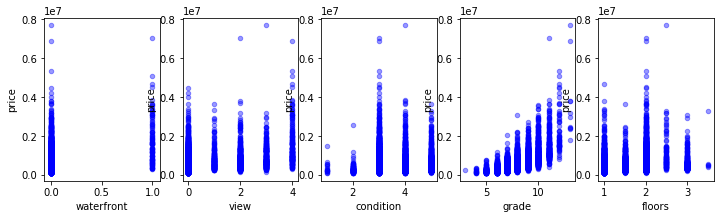

In [130]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(12,3))

for xcol, ax in zip(['waterfront','view', 'condition','grade','floors'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

In [131]:
data[['waterfront','view', 'condition','grade']].nunique()

waterfront     2
view           5
condition      5
grade         11
dtype: int64

In [44]:
#data = pd.concat([data,waterfront_dummies], axis=1)
#data = data.drop(['waterfront','id'],axis=1)
#data.head(10)

# Explore and Transformation

C:\anaconda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


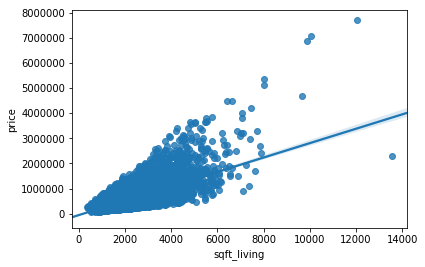

In [133]:
sns.regplot(x="sqft_living",y="price",data=data)

In [134]:
data.columns.values.tolist()

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

C:\anaconda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


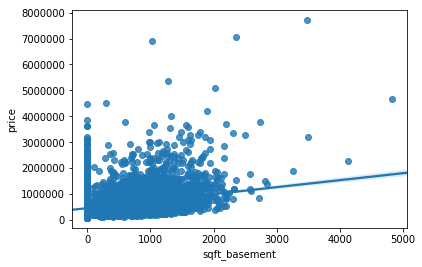

In [135]:
sns.regplot(x="sqft_basement",y="price",data=data)

C:\anaconda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


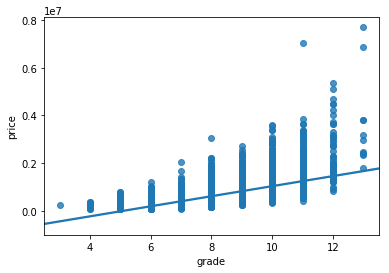

In [136]:
sns.regplot(x="grade",y="price",data=data)

C:\anaconda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


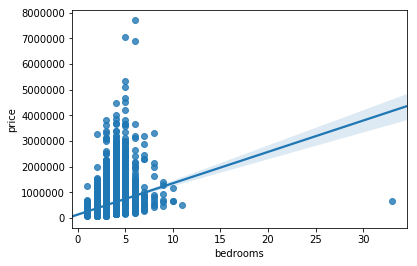

In [137]:
sns.regplot(x="bedrooms",y="price",data=data)

C:\anaconda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


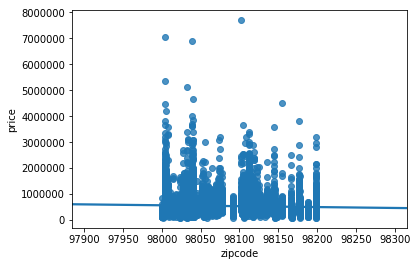

In [138]:
sns.regplot(x="zipcode",y="price",data=data)

C:\anaconda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


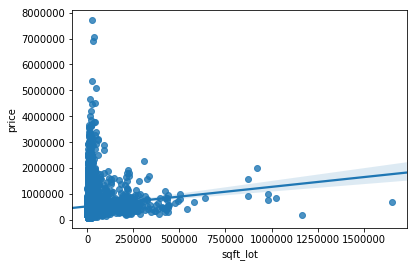

In [139]:
sns.regplot(x="sqft_lot",y="price",data=data)

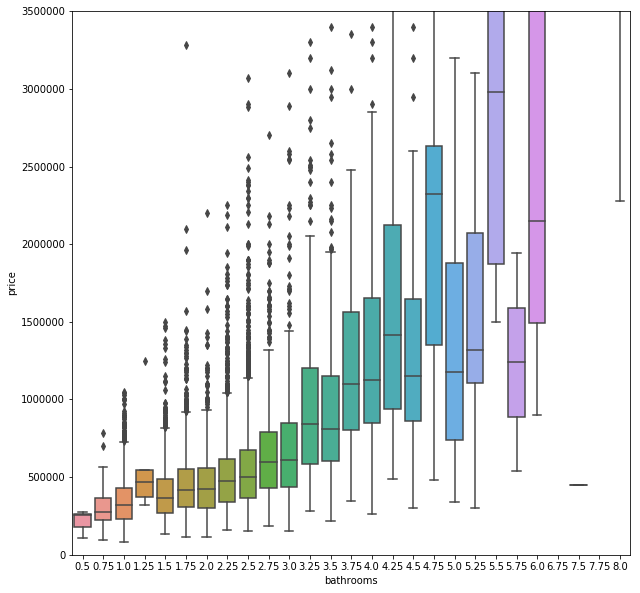

In [140]:
var = 'bathrooms'
data_graph = pd.concat([data['price'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 10))
fig = sns.boxplot(x=var, y="price", data=data_graph)
fig.axis(ymin=0, ymax=3500000);



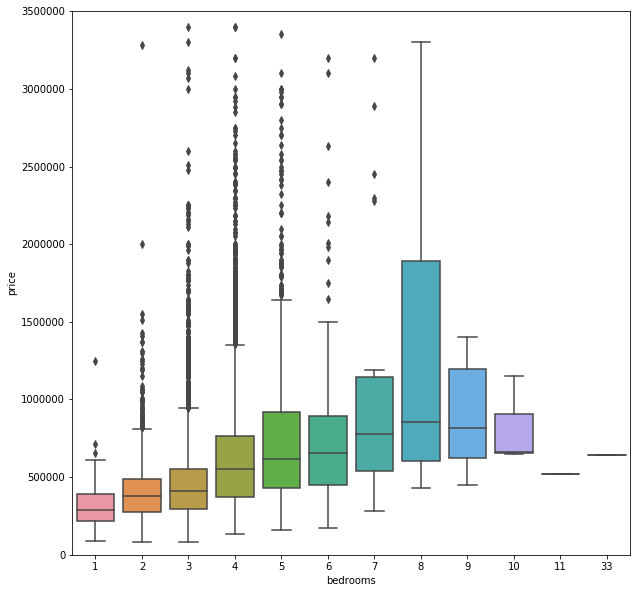

In [141]:
var = 'bedrooms'
data_graph = pd.concat([data['price'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 10))
fig = sns.boxplot(x=var, y="price", data=data_graph)
fig.axis(ymin=0, ymax=3500000);

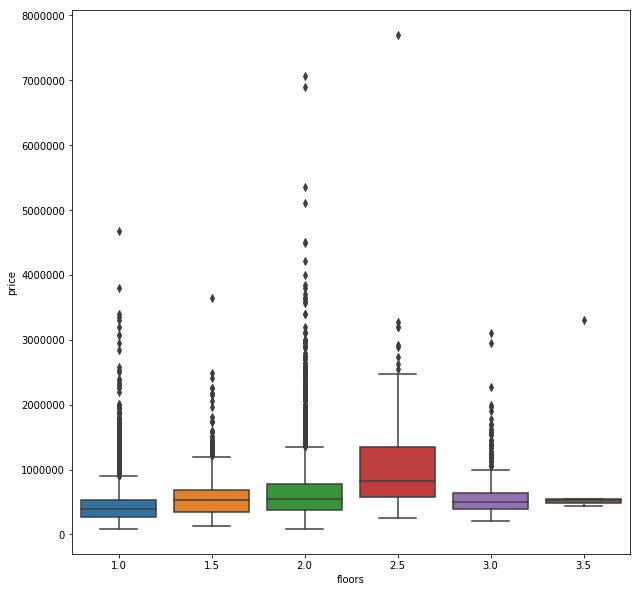

In [142]:
var = 'floors'
data_graph = pd.concat([data['price'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 10))
fig = sns.boxplot(x=var, y="price", data=data_graph)

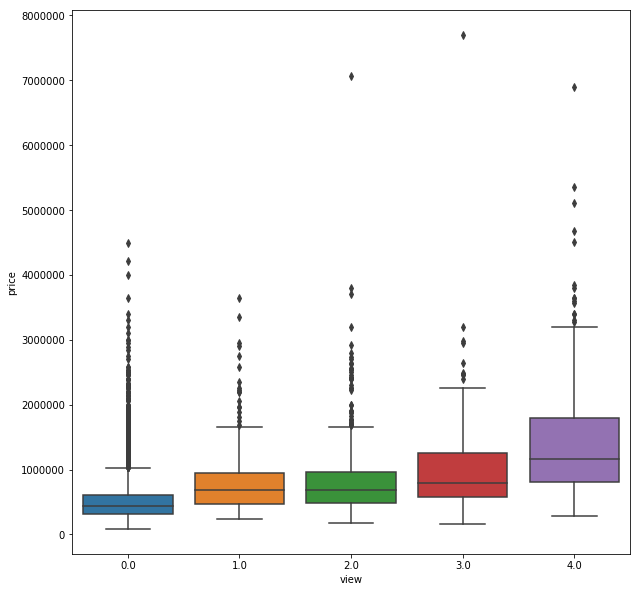

In [143]:
var = 'view'
data_graph = pd.concat([data['price'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 10))
fig = sns.boxplot(x=var, y="price", data=data_graph)

In [144]:
data.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.706498
grade            0.664356
sqft_above       0.612374
sqft_living15    0.583400
bathrooms        0.525655
view             0.397786
sqft_basement    0.320053
lat              0.306991
bedrooms         0.305792
waterfront       0.275718
floors           0.260143
yr_renovated     0.120981
sqft_lot         0.084687
sqft_lot15       0.080569
yr_built         0.050528
condition        0.033172
long             0.021948
id              -0.014954
zipcode         -0.049371
Name: price, dtype: float64

## Multicollinearity

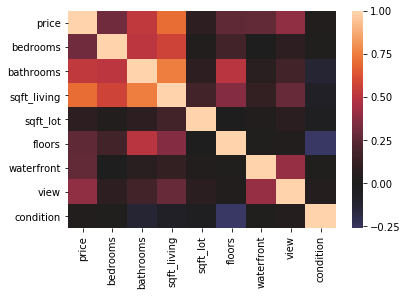

In [145]:
data_pred = data.iloc[:,2:11]
import seaborn as sns
sns.heatmap(data_pred.corr(), center=0);

In [146]:
abs(data_pred.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition
price,True,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False
floors,False,False,False,False,False,True,False,False,False
waterfront,False,False,False,False,False,False,True,False,False
view,False,False,False,False,False,False,False,True,False
condition,False,False,False,False,False,False,False,False,True


## Transformations and Scaling

Text(0.5, 1.0, 'after')

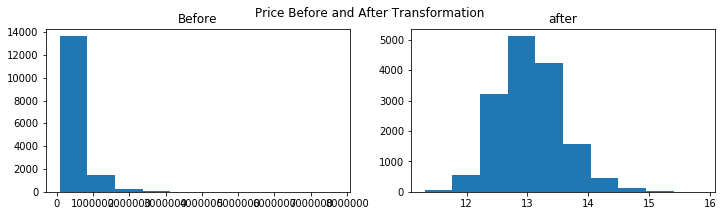

In [147]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3))
fig.suptitle('Price Before and After Transformation')

ax1.hist(data['price'])
ax1.set_title('Before')


data['log_price'] = np.log(data['price'])
ax2.hist(data['log_price'])
ax2.set_title('after')

#logbeds = data['log_bedrooms']
#(acc - min(acc)) / (max(acc) - min(acc))
#scaled_disp = (logdisp - np.mean(logdisp)) / np.sqrt(np.var(logdisp))
#data['scaled_beds'] = (logbeds - np.mean(logbeds) / np.sqrt(np.var(logbeds)))
#ax3.hist(data.scaled_beds)
#ax3.set_title('Scaled')

Text(0.5, 1.0, 'Scaled')

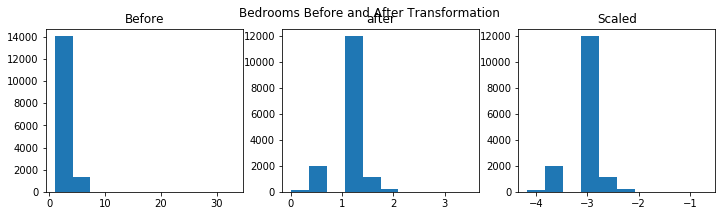

In [148]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12,3))
fig.suptitle('Bedrooms Before and After Transformation')

ax1.hist(data['bedrooms'])
ax1.set_title('Before')


data['log_bedrooms'] = np.log(data['bedrooms'])
ax2.hist(data['log_bedrooms'])
ax2.set_title('after')

logbeds = data['log_bedrooms']
#(acc - min(acc)) / (max(acc) - min(acc))
#scaled_disp = (logdisp - np.mean(logdisp)) / np.sqrt(np.var(logdisp))
data['scaled_beds'] = (logbeds - np.mean(logbeds) / np.sqrt(np.var(logbeds)))
ax3.hist(data.scaled_beds)
ax3.set_title('Scaled')

Text(0.5, 1.0, 'Scaled')

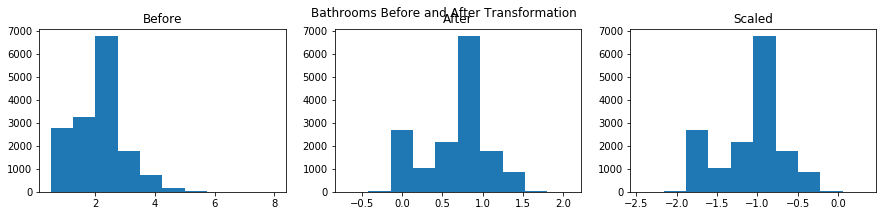

In [149]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,3))
fig.suptitle('Bathrooms Before and After Transformation')

ax1.hist(data['bathrooms'])
ax1.set_title('Before')

data['log_bathrooms'] = np.log(data['bathrooms'])
ax2.hist(data['log_bathrooms'])
ax2.set_title('After')

logbathrooms = data['log_bathrooms']
data['scaled_bathrooms'] = (logbathrooms - np.mean(logbathrooms) / np.sqrt(np.var(logbathrooms)))
ax3.hist(data.scaled_bathrooms)
ax3.set_title('Scaled')

#(logdisp - np.mean(logdisp)) / np.sqrt(np.var(logdisp))

Text(0.5, 1.0, 'Scaled')

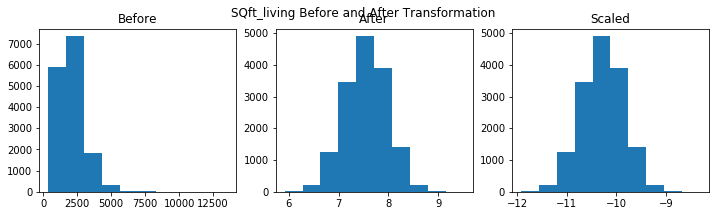

In [150]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12,3))
fig.suptitle('SQft_living Before and After Transformation')

ax1.hist(data['sqft_living'])
ax1.set_title('Before')

data['log_sqft_living'] = np.log(data['sqft_living'])
ax2.hist(data['log_sqft_living'])
ax2.set_title('After')

logsqftliving = data['log_sqft_living']
data['scaled_sqftliving'] = (logsqftliving - np.mean(logsqftliving) / np.sqrt(np.var(logsqftliving)))
ax3.hist(data.scaled_sqftliving)
ax3.set_title('Scaled')

Text(0.5, 1.0, 'Scaled')

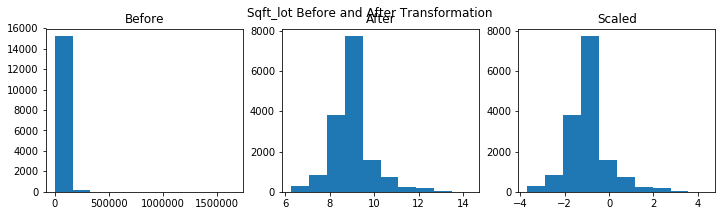

In [151]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12,3))
fig.suptitle('Sqft_lot Before and After Transformation')

ax1.hist(data['sqft_lot'])
ax1.set_title('Before')

data['log_sqft_lot'] = np.log(data['sqft_lot'])
ax2.hist(data['log_sqft_lot'])
ax2.set_title('After')

logsqftlot = data['log_sqft_lot']
data['scaled_sqftlot'] = (logsqftlot - np.mean(logsqftlot) / np.sqrt(np.var(logsqftlot)))
ax3.hist(data.scaled_sqftlot)
ax3.set_title('Scaled')



Text(0.5, 1.0, 'Scaled')

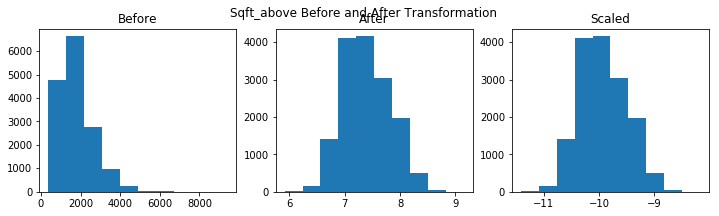

In [152]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12,3))
fig.suptitle('Sqft_above Before and After Transformation')

ax1.hist(data['sqft_above'])
ax1.set_title('Before')

data['log_sqft_above'] = np.log(data['sqft_above'])
ax2.hist(data['log_sqft_above'])
ax2.set_title('After')


logsqftabove = data['log_sqft_above']
data['scaled_sqftabove'] = (logsqftabove - np.mean(logsqftabove) / np.sqrt(np.var(logsqftabove)))
ax3.hist(data.scaled_sqftabove)
ax3.set_title('Scaled')



Text(0.5, 1.0, 'Scaled')

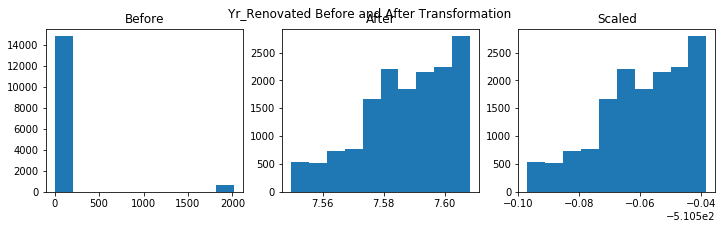

In [153]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12,3))
fig.suptitle('Yr_Renovated Before and After Transformation')

ax1.hist(data['yr_renovated'])
ax1.set_title('Before')

data['yr_renovated_fill'] = data.yr_renovated.replace(0,data['yr_built'])
data['log_yr_renovated'] = np.log(data['yr_renovated_fill'])

ax2.hist(data['log_yr_renovated'])
ax2.set_title('After')


logyr_renovated = data['log_yr_renovated']
data['scaled_yr_renovated'] = (logyr_renovated - np.mean(logyr_renovated) / np.sqrt(np.var(logyr_renovated)))
ax3.hist(data.scaled_yr_renovated)
ax3.set_title('Scaled')

Text(0.5, 1.0, 'Scaled')

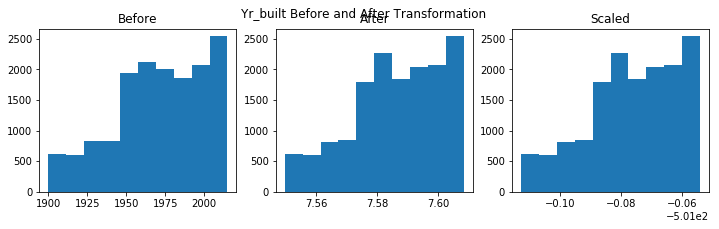

In [154]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12,3))
fig.suptitle('Yr_built Before and After Transformation')

ax1.hist(data['yr_built'])
ax1.set_title('Before')

data['log_yr_built'] = np.log(data['yr_built'])
ax2.hist(data['log_yr_built'])
ax2.set_title('After')


logyr_built = data['log_yr_built']
data['scaled_yr_built'] = (logyr_built - np.mean(logyr_built) / np.sqrt(np.var(logyr_built)))
ax3.hist(data.scaled_yr_built)
ax3.set_title('Scaled')

# MODEL

In [167]:
data_fin = pd.DataFrame([])
data_fin['sqft_lot'] = data['scaled_sqftlot']
data_fin['sqft_living'] = data['scaled_sqftliving']
data_fin['sqft_above'] = data['scaled_sqftabove']
#data_fin['zip_code'] = data['zipcode']
data_fin['bedrooms'] = data['bedrooms']
data_fin['view'] = data['view']
data_fin['condition'] = data['condition']
data_fin['grade'] = data['grade']
data_fin['bathrooms'] = data['bathrooms']
data_fin['yr_built'] = data['scaled_yr_built']
data_fin['renovated'] = data['scaled_yr_renovated']
data_fin['lat'] = data['lat']
data_fin['long'] = data['long']
#data_fin['waterfront'] = data['waterfront']
data_fin['floors'] = data['floors']
data_fin['sqft_living15'] = data['sqft_living15']
data_fin['sqft_lot15'] = data['sqft_lot15']
price = data['log_price']
data_ols = pd.concat([price, data_fin,], axis=1)

In [168]:
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols

outcome = 'price'
predictors = data_ols.drop('log_price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum


In [169]:
model = ols(formula= formula, data = data_ols, missing = 'drop').fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     3394.
Date:                Tue, 19 Nov 2019   Prob (F-statistic):               0.00
Time:                        22:52:10   Log-Likelihood:                -739.37
No. Observations:               15429   AIC:                             1511.
Df Residuals:                   15413   BIC:                             1633.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3558.5111    106.892    -33.291      0.000   -3768.032   -3348.990
sqft_lot         -0.0335      0.004     -8.910      0.000      -0.041      -0.026
sqft_living       0.3187      0.013     24.062      0.000       0.293       0.345
sqft_above        0.0429      0.013      3.413      0.001       0.018       0.068
bedrooms         -0.0228      0.003     -7.869      0.000      -0.029      -0.017
view              0.0835      0.003     28.470      0.000       0.078       0.089
condition         0.0621      0.003     17.759      0.000       0.055       0.069
grade             0.1585      0.003     49.658      0.000       0.152       0.165
bathrooms         0.0696      0.005     14.446      0.000       0.060       0.079
yr_built         -9.1609      0.346    -26.482      0.000      -9.839      -8.483
renovated         2.1208      0.359      5.909      0.000       1.417       2.824
lat               1.3416      0.016     85.335      0.000       1.311       1.372
long             -0.0175      0.018     -0.953      0.340      -0.054       0.019
floors            0.0339      0.006      5.638      0.000       0.022       0.046
sqft_living15     0.0001   5.13e-06     20.442      0.000    9.48e-05       0.000
sqft_lot15     8.187e-07   9.76e-08      8.387      0.000    6.27e-07    1.01e-06
==============================================================================
Omnibus:                      313.391   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              593.381
Skew:                           0.134   Prob(JB):                    1.41e-129
Kurtosis:                       3.922   Cond. No.                     1.60e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [170]:
X = data_fin
Y = data['log_price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [171]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

NameError: name 'y_hat_train' is not defined

In [172]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results  = np.mean(cross_val_score(linreg, X, Y, cv=5,  scoring='neg_mean_squared_error'))
print(cv_5_results)

NameError: name 'linreg' is not defined

In [173]:
data_fin = pd.DataFrame([])
data_fin['sqft_lot'] = data['scaled_sqftlot']
data_fin['sqft_living'] = data['scaled_sqftliving']
data_fin['sqft_above'] = data['scaled_sqftabove']
data_fin['rooms'] = data['bedrooms'] + data['bathrooms']
#data_fin['zip_code'] = data['zipcode']
#data_fin['bedrooms'] = data['bedrooms']
data_fin['view'] = data['view']
data_fin['condition'] = data['condition']
data_fin['grade'] = data['grade']
#data_fin['bathrooms'] = data['bathrooms']
data_fin['yr_built'] = data['scaled_yr_built']
data_fin['renovated'] = data['scaled_yr_renovated']
data_fin['lat'] = data['lat']
data_fin['long'] = data['long']
#data_fin['waterfront'] = data['waterfront']
data_fin['floors'] = data['floors']
data_fin['sqft_living15'] = data['sqft_living15']
data_fin['sqft_lot15'] = data['sqft_lot15']
price = data['log_price']
data_ols = pd.concat([price, data_fin,], axis=1)

In [174]:
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols

outcome = 'price'
predictors = data_ols.drop('log_price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum


In [175]:
model = ols(formula= formula, data = data_ols, missing = 'drop').fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     3565.
Date:                Tue, 19 Nov 2019   Prob (F-statistic):               0.00
Time:                        22:52:46   Log-Likelihood:                -856.52
No. Observations:               15429   AIC:                             1743.
Df Residuals:                   15414   BIC:                             1858.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3106.8827    103.547    -30.005      0.000   -3309.847   -2903.918
sqft_lot         -0.0375      0.004     -9.920      0.000      -0.045      -0.030
sqft_living       0.3507      0.013     26.609      0.000       0.325       0.377
sqft_above        0.0244      0.013      1.937      0.053      -0.000       0.049
rooms             0.0045      0.002      1.957      0.050   -7.29e-06       0.009
view              0.0869      0.003     29.504      0.000       0.081       0.093
condition         0.0644      0.004     18.278      0.000       0.057       0.071
grade             0.1662      0.003     52.295      0.000       0.160       0.172
yr_built         -8.9861      0.348    -25.795      0.000      -9.669      -8.303
renovated         2.8344      0.359      7.904      0.000       2.132       3.537
lat               1.3475      0.016     85.095      0.000       1.317       1.379
long             -0.0182      0.019     -0.985      0.325      -0.055       0.018
floors            0.0496      0.006      8.316      0.000       0.038       0.061
sqft_living15     0.0001   5.17e-06     20.677      0.000    9.67e-05       0.000
sqft_lot15     9.184e-07   9.81e-08      9.357      0.000    7.26e-07    1.11e-06
==============================================================================
Omnibus:                      324.467   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              603.693
Skew:                           0.150   Prob(JB):                    8.12e-132
Kurtosis:                       3.921   Cond. No.                     1.54e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

AttributeError: module 'statsmodels.formula.api' has no attribute 'qqplot'

# iNTERPRET

# CONCLUSIONS & RECOMMENDATIONS

> Summarize your conclusions and bullet-point your list of recommendations, which are based on your modeling results.